<a href="https://colab.research.google.com/github/AlexBB999/Bridges/blob/master/Bridges_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT EVERYTHING I MAY USE**

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import statistics
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**The current system for inspecting bridges is expensive, time-consuming and inefficient**

The FHWA requires evaluation of all bridges however; it is costly having a
bi­annual inspection cost of $2.7 billion for the U.S

where  the  average inspection costper bridge ranges from $4,500 to $10,000.  This requires closing lanes for the span of theinspection, which can take 1 to 3 days causing traffic congestions.

**https://catsr.vse.gmu.edu/SYST490/490_2014_BI/BIS_FinalReport.pdf**

**My objective in this project is adding granualrity/priortization to the process to help address at least part of the aforementioned shortcomings.** 

The current system assigns a score called the "Structural Evaluation" to each brdge. It is a 10 point scale. A score of 4 or less marks the bridge as "Structurally Deficient" -- meaning the bridge needs repairs -- possibly replacement. It now has a priority when allocating limited funds for bridge maintenance. But the scoring of  0,1,2,3,4 is not as granular as need be. For example -- if two bridges have a score of 3 -- which one  do we repair first? If we allow decimals then we could have a score of 3.1 versus 3.5 so we know which is the first to get our limited funds.

#**STAKEHOLDERS**

The stakeholders have been clearly defined in the above quoted article:

The primary stakeholders of the bridge inspection systems are the Federal
Highway Administration (FHWA), District Department of Transportation (DDOT),
Bridge Design Engineers, Bridge Construction Team, and the Inspection Team which are directly involved with the construction and inspection of the bridge. The secondary stakeholders are groups of people that are not directly involved with the construction andinspection but are impacted indirectly such as the traveling public or the Bridge Users.

**My immediate audience (cohorts+instructor+you) are secondary stakeholders. But clearly this is of value to primary stakeholders**.


#**EXPLANATION FOR COULMNS DROPPED BEFORE ANY ANALYSIS**

I am not creating a dashboard so any columns having to do with location/identification are **not** relevent at this time. Thus, I have dropped the following columns:

State_code

Record_type

Route_prefix

Route_number

Direction

Highway District

County_code

Place_code

Features_Desc

Location

Kilopoint

Base_Hwy_network

LRS_Inv_Route

Subroute

Latitude

Longitude

Detour Kilos

Cat 10

Cat 23

Without goiing into the same level of deatil , I have dropped all columns having to do with water/navigation and other irrelevant columns like Right_curb and Left_curb. I am not stating that this information is not useful -- I am simply simplifying this project. To factor in all 136 features and many subfeatures is not a project -- it's a full-time job.

In [0]:
bridges9 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',encoding='ISO-8859-1',low_memory=False)

**IDENTIFYING FEATURES BY COLUMN NUMBER**

In [0]:
g=list(range(1,138))

In [0]:
z=zip(g,list(bridges9))

In [0]:
list(z)

[(1, 'STATE_CODE_001'),
 (2, 'STRUCTURE_NUMBER_008'),
 (3, 'RECORD_TYPE_005A'),
 (4, 'ROUTE_PREFIX_005B'),
 (5, 'SERVICE_LEVEL_005C'),
 (6, 'ROUTE_NUMBER_005D'),
 (7, 'DIRECTION_005E'),
 (8, 'HIGHWAY_DISTRICT_002'),
 (9, 'COUNTY_CODE_003'),
 (10, 'PLACE_CODE_004'),
 (11, 'FEATURES_DESC_006A'),
 (12, 'CRITICAL_FACILITY_006B'),
 (13, 'FACILITY_CARRIED_007'),
 (14, 'LOCATION_009'),
 (15, 'MIN_VERT_CLR_010'),
 (16, 'KILOPOINT_011'),
 (17, 'BASE_HWY_NETWORK_012'),
 (18, 'LRS_INV_ROUTE_013A'),
 (19, 'SUBROUTE_NO_013B'),
 (20, 'LAT_016'),
 (21, 'LONG_017'),
 (22, 'DETOUR_KILOS_019'),
 (23, 'TOLL_020'),
 (24, 'MAINTENANCE_021'),
 (25, 'OWNER_022'),
 (26, 'FUNCTIONAL_CLASS_026'),
 (27, 'YEAR_BUILT_027'),
 (28, 'TRAFFIC_LANES_ON_028A'),
 (29, 'TRAFFIC_LANES_UND_028B'),
 (30, 'ADT_029'),
 (31, 'YEAR_ADT_030'),
 (32, 'DESIGN_LOAD_031'),
 (33, 'APPR_WIDTH_MT_032'),
 (34, 'MEDIAN_CODE_033'),
 (35, 'DEGREES_SKEW_034'),
 (36, 'STRUCTURE_FLARED_035'),
 (37, 'RAILINGS_036A'),
 (38, 'TRANSITIONS_036B'),


In [0]:
bridges9.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,FEATURES_DESC_006A,CRITICAL_FACILITY_006B,FACILITY_CARRIED_007,LOCATION_009,MIN_VERT_CLR_010,KILOPOINT_011,BASE_HWY_NETWORK_012,LRS_INV_ROUTE_013A,SUBROUTE_NO_013B,LAT_016,LONG_017,DETOUR_KILOS_019,TOLL_020,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,TRAFFIC_LANES_UND_028B,ADT_029,YEAR_ADT_030,DESIGN_LOAD_031,APPR_WIDTH_MT_032,MEDIAN_CODE_033,DEGREES_SKEW_034,STRUCTURE_FLARED_035,RAILINGS_036A,TRANSITIONS_036B,APPR_RAIL_036C,APPR_RAIL_END_036D,...,OTHER_STATE_PCNT_098B,OTHR_STATE_STRUC_NO_099,STRAHNET_HIGHWAY_100,PARALLEL_STRUCTURE_101,TRAFFIC_DIRECTION_102,TEMP_STRUCTURE_103,HIGHWAY_SYSTEM_104,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,BRIDGE_LEN_IND_112,SCOUR_CRITICAL_113,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,DATE_LAST_UPDATE,TYPE_LAST_UPDATE,DEDUCT_CODE,REMARKS,PROGRAM_CODE,PROJ_NO,PROJ_SUFFIX,NBI_TYPE_OF_IMP,DTL_TYPE_OF_IMP,SPECIAL_CODE,STEP_CODE,STATUS_WITH_10YR_RULE,SUFFICIENCY_ASTERC,SUFFICIENCY_RATING,STATUS_NO_10YR_RULE,CAT10,CAT23,CAT29
0,1,00000000000S702,1,6.0,1.0,04007,0.0,09,53.0,0,' PERDIDO CREEK',NaN,' IRR BIA RTE 4007',' 11.4KM NW OF ATMORE AL',99.99,1.500,0.0,0000000000,0.0,31061110.0,87341340.0,3,3,62,62,9.0,1999,2.0,0,50,2014.0,5,9.7,0.0,30,0.0,1,1,1,1,...,0.0,NaN,0.0,N,2.0,NaN,0,1.0,0.0,2,6,0,1,1.0,0.0,NaN,Y,8,100,2034.0,0.0,Y,5/24/2017,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,145.50
1,1,00000000000S703,1,6.0,1.0,04003,0.0,09,53.0,3004,' PERDIDO CREEK',NaN,' IRR BIA RTE 4003',' ON LYNN MCGEE ROAD',99.99,1.100,0.0,0000000000,0.0,31062020.0,87340890.0,3,3,62,62,9.0,2002,2.0,0,159,2014.0,5,6.5,0.0,0,0.0,1,1,1,1,...,0.0,NaN,0.0,N,2.0,NaN,0,1.0,0.0,2,6,0,8,1.0,0.0,NaN,Y,8,200,2034.0,0.0,Y,5/24/2017,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100.0,0,G,7,133.28
2,1,0000000000M0022,1,8.0,1.0,00000,0.0,00,113.0,27568,'UCHEE CREEK ',NaN,'101ST AIRBORNE RD ','3.4 KM S OF SUNSHINE RD ',99.99,0.000,0.0,NaN,NaN,32174328.0,84583800.0,18,3,74,74,9.0,1942,2.0,0,375,2015.0,4,10.4,0.0,0,0.0,0,0,1,1,...,NaN,NaN,0.0,N,2.0,NaN,0,0.0,0.0,1,1,0,0,35.0,0.0,NaN,Y,8,400,2037.0,NaN,Y,5/20/2016,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,69.5,0,F,5,387.00
3,1,000000883039900,1,4.0,1.0,00088,0.0,02,59.0,0,'LITTLE BEAR CR. DAM SPW ',NaN,'CO. RD 88 ','LITTLE BEAR CR DAM ',99.99,0.000,0.0,NaN,NaN,34270600.0,87581200.0,16,3,67,67,8.0,1974,2.0,0,300,2013.0,5,11.6,0.0,99,0.0,1,1,1,1,...,NaN,NaN,0.0,N,2.0,NaN,0,0.0,0.0,1,1,0,0,5.0,0.0,NaN,Y,8,350,2032.0,NaN,Y,5/10/2017,B,Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,90.2,0,G,7,687.75
4,1,000001014002450,1,3.0,1.0,00101,0.0,02,79.0,0,'TENNESSEE RIVER ',NaN,'SR 101 ','ON WHEELER DAM ',4.52,39.429,0.0,NaN,NaN,34481800.0,87225400.0,42,3,67,67,6.0,1937,2.0,0,6200,2014.0,4,7.9,0.0,0,0.0,1,0,0,0,...,NaN,NaN,0.0,N,2.0,NaN,0,0.0,1962.0,1,1,0,0,10.0,0.0,1.0,Y,9,10000,2030.0,NaN,Y,5/27/2016,B,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,49.9,2,F,6,15453.36


In [0]:
bridges9.info(137)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615002 entries, 0 to 615001
Data columns (total 137 columns):
STATE_CODE_001             int64
STRUCTURE_NUMBER_008       object
RECORD_TYPE_005A           int64
ROUTE_PREFIX_005B          float64
SERVICE_LEVEL_005C         float64
ROUTE_NUMBER_005D          object
DIRECTION_005E             float64
HIGHWAY_DISTRICT_002       object
COUNTY_CODE_003            float64
PLACE_CODE_004             int64
FEATURES_DESC_006A         object
CRITICAL_FACILITY_006B     float64
FACILITY_CARRIED_007       object
LOCATION_009               object
MIN_VERT_CLR_010           float64
KILOPOINT_011              float64
BASE_HWY_NETWORK_012       float64
LRS_INV_ROUTE_013A         object
SUBROUTE_NO_013B           float64
LAT_016                    float64
LONG_017                   float64
DETOUR_KILOS_019           int64
TOLL_020                   int64
MAINTENANCE_021            int64
OWNER_022                  int64
FUNCTIONAL_CLASS_026       float64

**I HAVE ALREADY DONE SOME FEATURE SELECTION, AS NOTED ABOVE,  SO I AM NOT USING ALL 136 FEATURES**

In [0]:
bridges99=bridges9.iloc[:,[4,22,23,26,27,31,45,47,54,59,66,67,68,72,74,75,76,106,107,108,109,132]]

In [0]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9


**GET AN OVERVIEW OF OUR DATA**

In [0]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615002 entries, 0 to 615001
Data columns (total 22 columns):
SERVICE_LEVEL_005C         614999 non-null float64
TOLL_020                   615002 non-null int64
MAINTENANCE_021            615002 non-null int64
YEAR_BUILT_027             615002 non-null int64
TRAFFIC_LANES_ON_028A      614998 non-null float64
DESIGN_LOAD_031            615002 non-null object
SERVICE_ON_042A            615002 non-null int64
STRUCTURE_KIND_043A        615002 non-null int64
MAX_SPAN_LEN_MT_048        615002 non-null float64
DECK_WIDTH_MT_052          614998 non-null float64
DECK_COND_058              615002 non-null object
SUPERSTRUCTURE_COND_059    615002 non-null object
SUBSTRUCTURE_COND_060      615002 non-null object
OPERATING_RATING_064       611057 non-null float64
INVENTORY_RATING_066       611093 non-null float64
STRUCTURAL_EVAL_067        615002 non-null object
DECK_GEOMETRY_EVAL_068     615002 non-null object
DECK_STRUCTURE_TYPE_107    615002 non-

In [0]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9


**CHECK FOR NAN**

In [0]:
bridges99.isna().sum()

SERVICE_LEVEL_005C            3
TOLL_020                      0
MAINTENANCE_021               0
YEAR_BUILT_027                0
TRAFFIC_LANES_ON_028A         4
DESIGN_LOAD_031               0
SERVICE_ON_042A               0
STRUCTURE_KIND_043A           0
MAX_SPAN_LEN_MT_048           0
DECK_WIDTH_MT_052             4
DECK_COND_058                 0
SUPERSTRUCTURE_COND_059       0
SUBSTRUCTURE_COND_060         0
OPERATING_RATING_064       3945
INVENTORY_RATING_066       3909
STRUCTURAL_EVAL_067           0
DECK_GEOMETRY_EVAL_068        0
DECK_STRUCTURE_TYPE_107       0
SURFACE_TYPE_108A             1
MEMBRANE_TYPE_108B            2
DECK_PROTECTION_108C          1
SUFFICIENCY_RATING            0
dtype: int64

**DROP NANs -- LESS THAN .6% OF DATA**

In [0]:
bridges99.dropna(how='any',inplace=True,axis=0)

In [0]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611039 entries, 0 to 615001
Data columns (total 22 columns):
SERVICE_LEVEL_005C         611039 non-null float64
TOLL_020                   611039 non-null int64
MAINTENANCE_021            611039 non-null int64
YEAR_BUILT_027             611039 non-null int64
TRAFFIC_LANES_ON_028A      611039 non-null float64
DESIGN_LOAD_031            611039 non-null object
SERVICE_ON_042A            611039 non-null int64
STRUCTURE_KIND_043A        611039 non-null int64
MAX_SPAN_LEN_MT_048        611039 non-null float64
DECK_WIDTH_MT_052          611039 non-null float64
DECK_COND_058              611039 non-null object
SUPERSTRUCTURE_COND_059    611039 non-null object
SUBSTRUCTURE_COND_060      611039 non-null object
OPERATING_RATING_064       611039 non-null float64
INVENTORY_RATING_066       611039 non-null float64
STRUCTURAL_EVAL_067        611039 non-null object
DECK_GEOMETRY_EVAL_068     611039 non-null object
DECK_STRUCTURE_TYPE_107    611039 non-

In [0]:
bridges99['STRUCTURAL_EVAL_067'].value_counts(dropna=False)

7    176798
6    172466
5    106191
8     72235
4     44467
2     15137
3     10676
9      9818
0      3251
Name: STRUCTURAL_EVAL_067, dtype: int64

**THE TARGET IS STRUCTURAL_EVALUATION**

**THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"**

**CREATE NEW FEATURE - MAIN SPAN SURFACE AREA  =MAX_SPAN_LEN_MT_048 X DECK_WIDTH_MT_052**

**THE TOTAL SURFACE AREA OF THE MAIN SPAN HAS BEEN USED IN SOME STUDIES**

In [0]:
bridges99['surface_area']=bridges99['MAX_SPAN_LEN_MT_048']*bridges99['DECK_WIDTH_MT_052']

In [0]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,surface_area
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,142.59
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,126.42
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,164.70
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,147.00
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,415.74


In [0]:
bridges99['SURFACE_TYPE_108A'].value_counts()

6    181006
1    172795
N     96629
0     62881
8     26041
2     17381
7     14473
3     13362
9     10668
4      9249
5      6554
Name: SURFACE_TYPE_108A, dtype: int64

Type of Service On Bridge

Code            Description

1                  Highway

2                  Railroad

3                  Pedestrian-bicycle

4                  Highway-railroad

5                  Highway-pedestrian

6                  Overpass structure at an interchange or second level of a multilevel interchange

7                  Third level (Interchange)

8                  Fourth level (Interchange)

9                  Building of plaza


0                  Other

99                 Miscoded data

**KEEP ONLY BRIDGES THAT ARE HIGHWAY OR HIGHWAY-PEDESTRIAN (10,246 dropped)**

**Again, I have to limit this project so I am keeping the two designation that make up over 90% of the bridges**.

In [0]:
bridges9['SERVICE_ON_042A'].value_counts(dropna=False)

1    550652
5     53308
6     10074
7       575
4       223
8       170
Name: SERVICE_ON_042A, dtype: int64

In [0]:
bridges99=bridges99[(bridges99['SERVICE_ON_042A']==1) | (bridges99['SERVICE_ON_042A']==5) ]

In [0]:
bridges99['SERVICE_ON_042A'].value_counts()

1    546824
5     53186
Name: SERVICE_ON_042A, dtype: int64

In [0]:
bridges99.shape

(600010, 23)

**CONVERT STRUCTURAL_EVALUATION TO NUMERIC**

In [0]:
bridges99['STRUCTURAL_EVAL_067']=bridges99['STRUCTURAL_EVAL_067'].str.strip('()')
type(bridges99['STRUCTURAL_EVAL_067'][0])

str

In [0]:
bridges99['STRUCTURAL_EVAL_067']=bridges99['STRUCTURAL_EVAL_067'].astype(int)

In [0]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600010 entries, 0 to 615001
Data columns (total 23 columns):
SERVICE_LEVEL_005C         600010 non-null float64
TOLL_020                   600010 non-null int64
MAINTENANCE_021            600010 non-null int64
YEAR_BUILT_027             600010 non-null int64
TRAFFIC_LANES_ON_028A      600010 non-null float64
DESIGN_LOAD_031            600010 non-null object
SERVICE_ON_042A            600010 non-null int64
STRUCTURE_KIND_043A        600010 non-null int64
MAX_SPAN_LEN_MT_048        600010 non-null float64
DECK_WIDTH_MT_052          600010 non-null float64
DECK_COND_058              600010 non-null object
SUPERSTRUCTURE_COND_059    600010 non-null object
SUBSTRUCTURE_COND_060      600010 non-null object
OPERATING_RATING_064       600010 non-null float64
INVENTORY_RATING_066       600010 non-null float64
STRUCTURAL_EVAL_067        600010 non-null int64
DECK_GEOMETRY_EVAL_068     600010 non-null object
DECK_STRUCTURE_TYPE_107    600010 non-n

**HISTOGRAMS OF NUMERICAL FEATURES**

**TO HELP WITH FEATURE ENGINEERING**

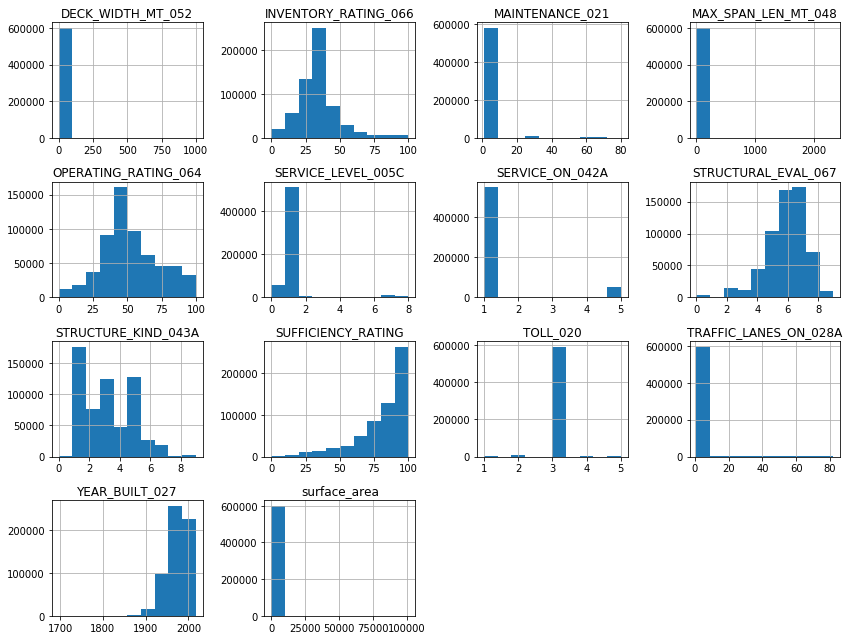

In [0]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

In [0]:
bridges99.head()

,SERVICE_LEVEL_005C,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,surface_area
0,1.0,3,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,142.59
1,1.0,3,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,126.42
2,1.0,3,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,164.70
3,1.0,3,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,147.00
4,1.0,3,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,415.74


**NOW THAT ALL TOLL VALUES ARE IDENTICAL TOLL  CONTRIBUTES NOTHING TO MODEL SO DROP** 

In [0]:
bridges99.drop('TOLL_020',axis=1,inplace=True)

In [0]:
bridges99.head()

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,surface_area
0,1.0,62,1999,2.0,5,1,5,14.7,9.7,8,8,7,44.2,32.4,7,7,2,6,0,1,100.0,142.59
1,1.0,62,2002,2.0,5,1,5,12.9,9.8,8,8,7,84.2,34.6,7,6,2,6,0,8,100.0,126.42
2,1.0,74,1942,2.0,4,1,1,18.3,9.0,5,5,6,51.7,37.2,5,4,1,1,0,0,69.5,164.70
3,1.0,67,1974,2.0,5,1,5,14.0,10.5,7,7,7,44.2,26.6,6,6,1,1,0,0,90.2,147.00
4,1.0,67,1937,2.0,4,5,3,53.3,7.8,6,6,7,40.0,23.9,5,2,1,1,0,0,49.9,415.74


**6.1 METERS IS FEDERAL MINIMUM TO BE A BRIDGE**

**REMOVE BRIDGES LESS THAN 6.1 METERS MAIN SPAN**  (152,926)

**About 25% of the listed bridges meet state definitions of a bridge. I am only looking at those that meet the federal definition**.

In [0]:
bridges99=bridges99[bridges99['MAX_SPAN_LEN_MT_048']>=6.1]

In [0]:
bridges99.shape

(448505, 22)

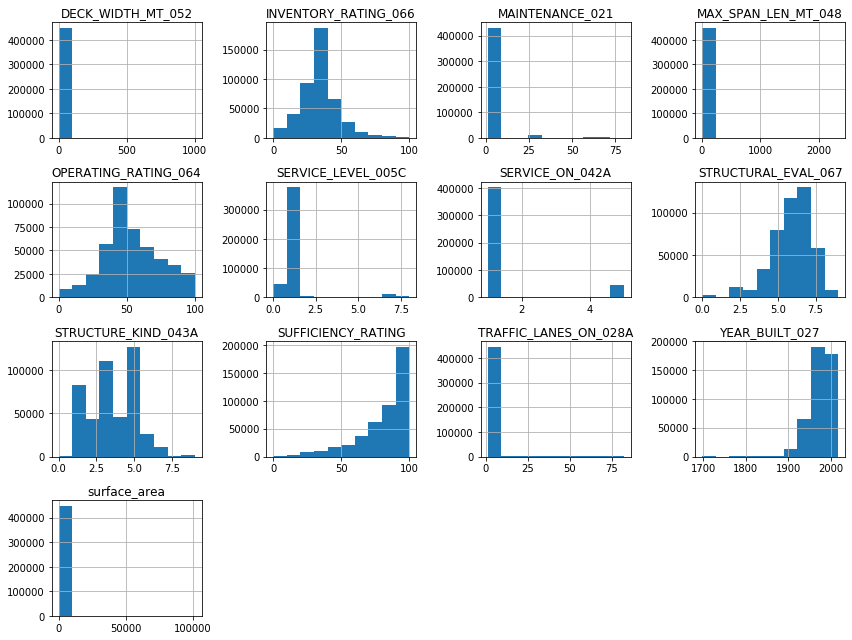

In [0]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

In [0]:
bridges99.shape

(448505, 22)

**SOME CRAZY NUMBERS IN LANE COUNT LIKE 80 LANES --  TYPOS?**

**WILL KEEP TOP 4 SUBCATEGORIES -- 1,2,3,4 lanes -- THEY MAKE UP OVER 95% OF VALUES**

In [0]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts()

2.0     352442
1.0      35371
4.0      25187
3.0      17971
5.0       6316
6.0       6001
8.0       1740
7.0       1475
10.0       713
9.0        537
12.0       267
11.0       231
13.0        92
14.0        79
20.0        31
15.0        15
16.0        10
40.0         5
50.0         5
17.0         4
45.0         2
18.0         2
19.0         1
70.0         1
80.0         1
82.0         1
21.0         1
30.0         1
25.0         1
22.0         1
60.0         1
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [0]:
bridges99=bridges99[(bridges99['TRAFFIC_LANES_ON_028A']==1) | (bridges99['TRAFFIC_LANES_ON_028A']==2) |(bridges99['TRAFFIC_LANES_ON_028A']==3)| (bridges99['TRAFFIC_LANES_ON_028A']==4)]

In [0]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts()

2.0    352442
1.0     35371
4.0     25187
3.0     17971
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [0]:
bridges99.shape

(430971, 22)

df.groupby('city').filter(lambda x : len(x)>3)

Solution two transform

sub_df = df[df.groupby('city').city.transform('count')>3].copy()

**CREATING SUBSET OF NUMERICAL FEATURES**

In [0]:
n=[col for col in list(bridges99) if bridges99[col].dtype!=object]
n

['SERVICE_LEVEL_005C',
 'MAINTENANCE_021',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'OPERATING_RATING_064',
 'INVENTORY_RATING_066',
 'STRUCTURAL_EVAL_067',
 'SUFFICIENCY_RATING',
 'surface_area']

**BIVARIATE ANALYSIS**

temporarily add the target back in to numerical features

In [0]:
bridges99[n].corr()

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,OPERATING_RATING_064,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,SUFFICIENCY_RATING,surface_area
SERVICE_LEVEL_005C,1.000000,0.006780,0.054470,-0.086543,-0.042021,0.034531,0.122368,0.012676,0.032130,0.036527,0.047170,0.054556,0.073099
MAINTENANCE_021,0.006780,1.000000,-0.000624,-0.069326,0.020857,0.044238,0.019518,-0.030361,-0.040467,-0.005638,-0.010980,-0.034150,0.003389
YEAR_BUILT_027,0.054470,-0.000624,1.000000,0.084600,-0.064702,0.250085,0.149713,0.115903,0.318658,0.337202,0.582258,0.552313,0.157493
TRAFFIC_LANES_ON_028A,-0.086543,-0.069326,0.084600,1.000000,0.220105,0.021393,0.168535,0.571129,0.160844,0.147694,0.149896,0.143413,0.407769
SERVICE_ON_042A,-0.042021,0.020857,-0.064702,0.220105,1.000000,-0.001834,0.092158,0.264131,0.087118,0.069292,-0.001081,-0.039007,0.170062
STRUCTURE_KIND_043A,0.034531,0.044238,0.250085,0.021393,-0.001834,1.000000,0.222388,0.075072,0.099025,0.077836,0.140719,0.139243,0.182569
MAX_SPAN_LEN_MT_048,0.122368,0.019518,0.149713,0.168535,0.092158,0.222388,1.000000,0.235462,0.151991,0.110738,0.125917,0.087531,0.859826
DECK_WIDTH_MT_052,0.012676,-0.030361,0.115903,0.571129,0.264131,0.075072,0.235462,1.000000,0.213389,0.181138,0.184165,0.222289,0.570139
OPERATING_RATING_064,0.032130,-0.040467,0.318658,0.160844,0.087118,0.099025,0.151991,0.213389,1.000000,0.880073,0.539251,0.547272,0.182584
INVENTORY_RATING_066,0.036527,-0.005638,0.337202,0.147694,0.069292,0.077836,0.110738,0.181138,0.880073,1.000000,0.565231,0.561306,0.145381


**HEATMAP**

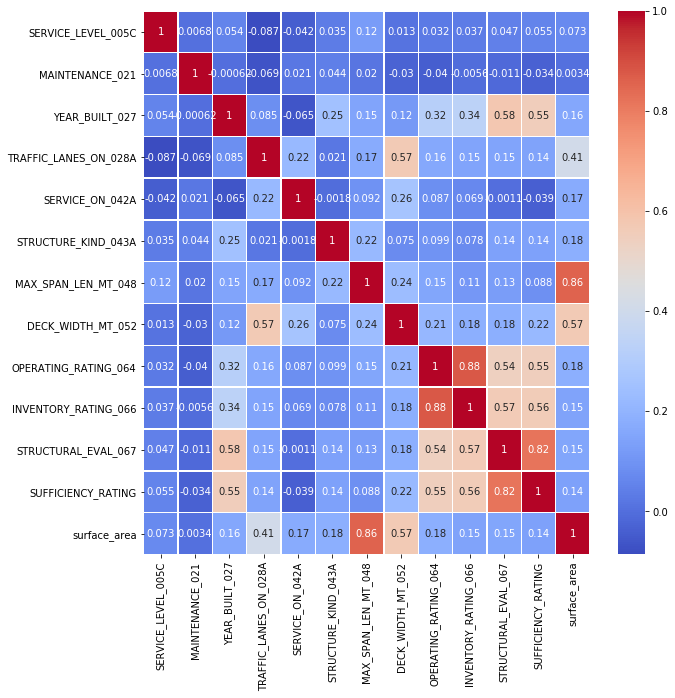

In [0]:
plt.figure(figsize=(10,10))
sns.heatmap(bridges99[n].corr(),annot=True,linewidth=0.5,cmap='coolwarm')

**OVERALL NOT MUCH CORREALTION -- I WILL DROP OPERATOR RATING .88 CORRELATION WITH INVENTORY RATING**

In [0]:
bridges99.drop('OPERATING_RATING_064',axis=1,inplace=True)

In [0]:
bridges99.shape

(430971, 21)

  **CREATING SUBSET OF OBJECT FEATURES**

In [0]:
k=[col for col in list(bridges99) if bridges99[col].dtype==object]
k

['DESIGN_LOAD_031',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'DECK_GEOMETRY_EVAL_068',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C']

**GET VALUE_COUNT GETS FOR ALL CATEGORICALS**

In [0]:
for col in k:
  print(col)
  print(bridges99[col].value_counts())
  print('')

DESIGN_LOAD_031
5    171365
0     78803
6     45125
2     35111
4     31930
9     26386
A     17008
1     15125
3      7761
C      1434
B       840
8        69
7        14
Name: DESIGN_LOAD_031, dtype: int64

DECK_COND_058
7    168936
6     97857
8     68595
5     48430
N     20014
9     11923
4     11903
3      2245
0       633
2       348
1        87
Name: DECK_COND_058, dtype: int64

SUPERSTRUCTURE_COND_059
7    150158
6     93389
8     91153
5     48638
N     15108
9     14544
4     13766
3      2843
0       648
2       525
1       199
Name: SUPERSTRUCTURE_COND_059, dtype: int64

SUBSTRUCTURE_COND_060
7    158086
6     95794
8     77594
5     51252
N     15236
4     15218
9     12461
3      3617
2       917
0       639
1       157
Name: SUBSTRUCTURE_COND_060, dtype: int64

DECK_GEOMETRY_EVAL_068
6    95855
5    95725
4    74948
7    53453
9    32011
2    30920
3    26875
N    10545
8    10076
0      560
*        3
Name: DECK_GEOMETRY_EVAL_068, dtype: int64

DECK_STRUCTURE_TYPE_107


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
#df_encoded = df.apply(le.fit_transform)
bridges99_encoded=bridges99.apply(le.fit_transform)

In [0]:
bridges99_encoded

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,surface_area
0,1,17,191,1,5,0,5,86,89,8,8,7,321,6,7,1,6,0,1,977,5044
1,1,17,194,1,5,0,5,68,90,8,8,7,343,6,6,1,6,0,7,977,4317
2,1,27,134,1,4,0,1,122,82,5,5,6,369,4,4,0,1,0,0,672,5999
3,1,21,166,1,5,0,5,79,97,7,7,7,263,5,6,0,1,0,0,879,5243
4,1,21,129,1,4,1,3,472,70,6,6,7,236,4,2,0,1,0,0,476,16182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614989,7,3,204,1,5,0,3,19,72,6,6,7,472,5,2,0,1,6,9,787,1549
614990,0,0,208,1,6,0,5,33,31,8,8,8,555,7,2,9,10,6,9,787,411
614992,1,18,202,1,0,0,3,149,49,8,8,8,324,7,4,4,6,0,0,822,4010
614993,0,18,204,1,10,0,5,152,67,8,8,8,414,7,4,0,1,0,0,956,5782


In [0]:
type(bridges99_encoded)

pandas.core.frame.DataFrame

In [0]:
n2=['SERVICE_LEVEL_005C',
 'MAINTENANCE_021',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'INVENTORY_RATING_066',
 'SUFFICIENCY_RATING',
 'surface_area']

In [0]:
bridges99[n2].shape

(430971, 11)

In [0]:
dat1 = pd.concat([bridges99[n2], bridges99_encoded], axis=1)

In [0]:
dat1

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,INVENTORY_RATING_066,SUFFICIENCY_RATING,surface_area,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SUFFICIENCY_RATING,surface_area
0,1.0,62,1999,2.0,1,5,14.7,9.7,32.4,100.0,142.59,1,17,191,1,5,0,5,86,89,8,8,7,321,6,7,1,6,0,1,977,5044
1,1.0,62,2002,2.0,1,5,12.9,9.8,34.6,100.0,126.42,1,17,194,1,5,0,5,68,90,8,8,7,343,6,6,1,6,0,7,977,4317
2,1.0,74,1942,2.0,1,1,18.3,9.0,37.2,69.5,164.70,1,27,134,1,4,0,1,122,82,5,5,6,369,4,4,0,1,0,0,672,5999
3,1.0,67,1974,2.0,1,5,14.0,10.5,26.6,90.2,147.00,1,21,166,1,5,0,5,79,97,7,7,7,263,5,6,0,1,0,0,879,5243
4,1.0,67,1937,2.0,5,3,53.3,7.8,23.9,49.9,415.74,1,21,129,1,4,1,3,472,70,6,6,7,236,4,2,0,1,0,0,476,16182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614989,8.0,4,2012,2.0,1,3,8.0,8.0,47.5,81.0,64.00,7,3,204,1,5,0,3,19,72,6,6,7,472,5,2,0,1,6,9,787,1549
614990,0.0,1,2016,2.0,1,5,9.4,3.9,55.8,81.0,36.66,0,0,208,1,6,0,5,33,31,8,8,8,555,7,2,9,10,6,9,787,411
614992,1.0,63,2010,2.0,1,3,21.0,5.7,32.7,84.5,119.70,1,18,202,1,0,0,3,149,49,8,8,8,324,7,4,4,6,0,0,822,4010
614993,0.0,63,2012,2.0,1,5,21.3,7.5,41.7,97.9,159.75,0,18,204,1,10,0,5,152,67,8,8,8,414,7,4,0,1,0,0,956,5782


In [0]:
X=dat1.drop('STRUCTURAL_EVAL_067',axis=1)
y=bridges99['STRUCTURAL_EVAL_067']
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size = 0.2, random_state = 465)

X_train=StandardScaler.fit_transform(X_train)


In [0]:
rfc=RandomForestRegressor(max_depth=2)
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
rf_predictions = rfc.predict(X_test)

In [0]:
rfc.score(X_train,y_train)

0.7087355281704499

In [0]:
rfc.score(X_test,y_test)

0.7115633666259095

In [0]:
# answer below:
important_features_dict = {}
for x,i in enumerate(rfc.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

print ('Most important features: %s' %important_features_list)

Most important features: [29, 9, 22, 8, 23, 0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30]


//////////////////////////////////////////////////////////////////////////////////////////////////////////


In [0]:
importances = rfc.feature_importances_

In [0]:
indices = np.argsort(importances)

In [0]:
features = X.columns

In [0]:
list(dat1)

['SERVICE_LEVEL_005C',
 'MAINTENANCE_021',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'INVENTORY_RATING_066',
 'SUFFICIENCY_RATING',
 'surface_area',
 'SERVICE_LEVEL_005C',
 'MAINTENANCE_021',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'DESIGN_LOAD_031',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'SUBSTRUCTURE_COND_060',
 'INVENTORY_RATING_066',
 'STRUCTURAL_EVAL_067',
 'DECK_GEOMETRY_EVAL_068',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C',
 'SUFFICIENCY_RATING',
 'surface_area']

Text(0.5, 0, 'Relative Importance')

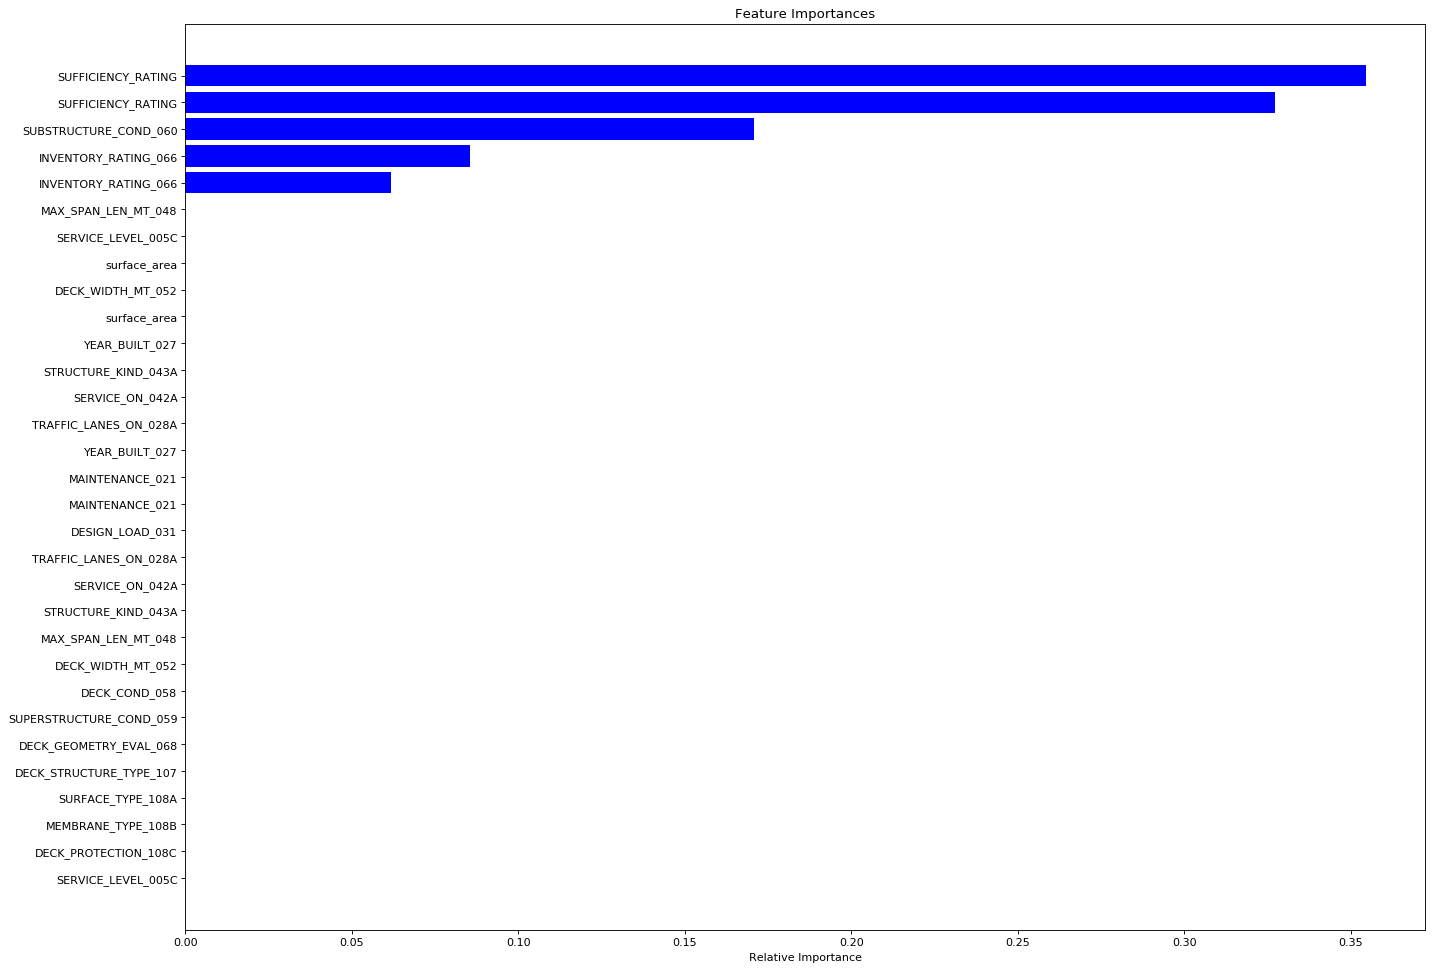

In [0]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20,15), dpi=80, facecolor='w', edgecolor='k')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

//////////////////////////////////////////////////////////////////////////////////////////////////////

In [0]:
rfc.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08547802, 0.32732312,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.17079652, 0.06177233, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.35463001,
       0.        ])

In [0]:
bridges_complete

,DECK_COND_058,DECK_GEOMETRY_EVAL_068,DECK_PROTECTION_108C,DECK_STRUCTURE_TYPE_107,DECK_WIDTH_MT_052,DESIGN_LOAD_031,INVENTORY_RATING_066,MAINTENANCE_021,MAX_SPAN_LEN_MT_048,MEMBRANE_TYPE_108B,SERVICE_LEVEL_005C,SERVICE_ON_042A,STRUCTURAL_EVAL_067,STRUCTURE_KIND_043A,SUBSTRUCTURE_COND_060,SUFFICIENCY_RATING,SUPERSTRUCTURE_COND_059,SURFACE_TYPE_108A,TRAFFIC_LANES_ON_028A,YEAR_BUILT_027,surface_area
0,NaN,NaN,NaN,NaN,9.7,NaN,32.4,62,14.7,NaN,1.0,1,NaN,5,NaN,100.0,NaN,NaN,2.0,1999,142.59
1,NaN,NaN,NaN,NaN,9.8,NaN,34.6,62,12.9,NaN,1.0,1,NaN,5,NaN,100.0,NaN,NaN,2.0,2002,126.42
2,NaN,NaN,NaN,NaN,9.0,NaN,37.2,74,18.3,NaN,1.0,1,NaN,1,NaN,69.5,NaN,NaN,2.0,1942,164.70
3,NaN,NaN,NaN,NaN,10.5,NaN,26.6,67,14.0,NaN,1.0,1,NaN,5,NaN,90.2,NaN,NaN,2.0,1974,147.00
4,NaN,NaN,NaN,NaN,7.8,NaN,23.9,67,53.3,NaN,1.0,5,NaN,3,NaN,49.9,NaN,NaN,2.0,1937,415.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614989,6.0,2.0,9.0,0.0,72.0,5.0,472.0,3,19.0,6.0,7.0,0,5.0,3,7.0,787.0,6.0,1.0,1.0,204,1549.00
614990,8.0,2.0,9.0,9.0,31.0,6.0,555.0,0,33.0,6.0,0.0,0,7.0,5,8.0,787.0,8.0,10.0,1.0,208,411.00
614992,8.0,4.0,0.0,4.0,49.0,0.0,324.0,18,149.0,0.0,1.0,0,7.0,3,8.0,822.0,8.0,6.0,1.0,202,4010.00
614993,8.0,4.0,0.0,0.0,67.0,10.0,414.0,18,152.0,0.0,0.0,0,7.0,5,8.0,956.0,8.0,1.0,1.0,204,5782.00


In [0]:
bridges99[n2].merge(bridges99_encoded)

,SERVICE_LEVEL_005C,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,SERVICE_ON_042A,STRUCTURE_KIND_043A,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,INVENTORY_RATING_066,SUFFICIENCY_RATING,surface_area,DESIGN_LOAD_031,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C


**PLOT CATEGORICAL SUBFEATURES IN ORDER OF IMPORTANCE**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

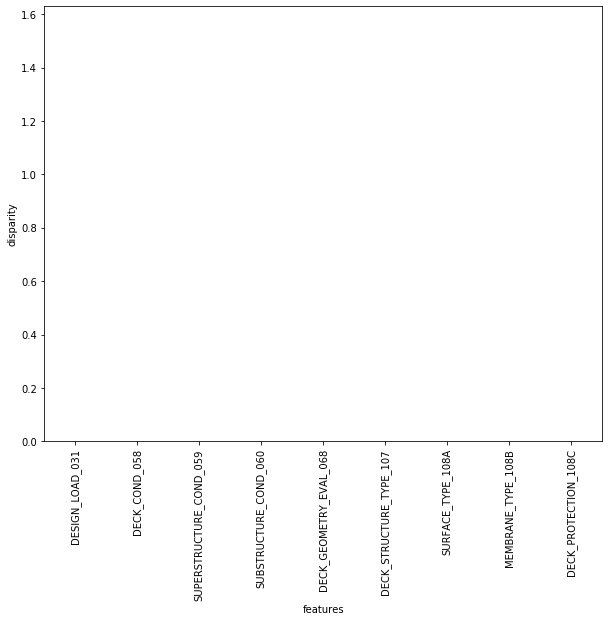

In [0]:
cat_data = bridges99.select_dtypes(exclude=[np.number])
plt.rcParams['figure.figsize'] = (10.0, 8.0)
cat = [f for f in bridges99.columns if bridges99.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                 
                  s = frame[frame[c] == cls]['STRUCTURAL_EVAL_067'].values
               
                  samples.append(s)
           #print('samples   ',samples)
           pval = stats.f_oneway(*samples)[1]
          
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['STRUCTURAL_EVAL_067'] = bridges99.STRUCTURAL_EVAL_067.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 

plt 

In [0]:
a=bridges99[bridges99['DESIGN_LOAD_031']=='5']['STRUCTURAL_EVAL_067'].values     
b=bridges99[bridges99['DESIGN_LOAD_031']=='4']['STRUCTURAL_EVAL_067'].values   
c=bridges99[bridges99['DESIGN_LOAD_031']=='3']['STRUCTURAL_EVAL_067'].values   
d=bridges99[bridges99['DESIGN_LOAD_031']=='1']['STRUCTURAL_EVAL_067'].values   

In [0]:
stats.f_oneway(a,b)

F_onewayResult(statistic=11781.18004641202, pvalue=0.0)

In [0]:
bridges99['DESIGN_LOAD_031'].unique()

array(['5', '4', '3', '1', '2', '0', '6', 'A', '9', 'C', 'B', '8', '7'],
      dtype=object)